# Data Preparation

In [220]:
import pandas as pd

In [221]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [222]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

Dataset memiliki 3008 baris dan 33 fitur. Fitur yang digunakan untuk klasifikasi kenyamanan termal (*thermal comfort*) berdasarkan *Fanger's parameter* dan ASHRAE 55 :
- Indoor Air Termperature (Ti)
- Relative Humidity (RH)
- Temperature mean radiant (Tmr)
- Air Velocity (Va)
- Metabolism rate (met)
- Clothing insulation (clo)

Thermal Preference Vote (TP) merupakan skala yang menggambarkan tingkat kenyamanan dari *cold uncomfortable* - *comfort* - *hot uncomfortable* dengan nilai -3 sampai +3
![Thermal Preference Vote (kanan)](https://ars.els-cdn.com/content/image/1-s2.0-S2212095517301025-gr4.jpg)

In [301]:
data = dataset[['Ti','RH', 'Tmr', 'Va', 'met', 'clo', 'TSV']]
data

,Ti,RH,Tmr,Va,met,clo,TSV
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1.0
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1.0
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1.0
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1.0
4,24.0,46.5,25.510728,0.1,1.10,0.40,0.0
...,...,...,...,...,...,...,...
3003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data di atas masih perlu dicek ada/tidaknya *null/NaN value* untuk selanjutnya dihilangkan apabila ada

In [302]:
data.isnull().sum()

Ti     400
RH     400
Tmr    400
Va     400
met    400
clo    400
TSV    400
dtype: int64

In [303]:
data = data.dropna()
data

,Ti,RH,Tmr,Va,met,clo,TSV
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1.0
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1.0
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1.0
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1.0
4,24.0,46.5,25.510728,0.1,1.10,0.400,0.0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1.0
2604,13.8,55.5,14.198998,0.1,1.10,0.830,0.0
2605,14.2,53.8,12.796541,0.1,1.10,1.150,-1.0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1.0


Selanjutnya dilakuakan pengecekan *unique feature* yaitu TP untuk melihat ada tidaknya nilai string yang tidak merepresentasikan *Thermal Preference Vote*

In [304]:
data.TSV.unique()

array([-1.,  0.,  1., -2.,  2., -3.,  3.])

In [305]:
# data = data.drop(data.index[data['comfort']==' '])
# data = data.drop(data.index[data['comfort']=='0'])
# data

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ti      2608 non-null   float64
 1   RH      2608 non-null   float64
 2   Tmr     2608 non-null   float64
 3   Va      2608 non-null   float64
 4   met     2608 non-null   float64
 5   clo     2608 non-null   float64
 6   TSV     2608 non-null   float64
dtypes: float64(7)
memory usage: 163.0 KB


In [307]:
data.describe()

,Ti,RH,Tmr,Va,met,clo,TSV
count,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,20.625874,67.071547,21.393962,0.177312,1.115537,0.853717,-0.215107
std,4.918399,11.840747,5.983185,0.270664,0.121375,0.339475,1.090519
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000,-3.000000
25%,16.600000,60.400000,16.494298,0.100000,1.100000,0.580000,-1.000000
50%,20.100000,69.600000,20.991648,0.100000,1.100000,0.790000,0.000000
75%,23.700000,75.300000,24.624755,0.100000,1.100000,1.060000,1.000000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.300000,3.000000


In [308]:
data['TSV'].value_counts()

-1.0    850
 0.0    831
 1.0    569
-2.0    182
 2.0    102
-3.0     57
 3.0     17
Name: TSV, dtype: int64

TP memiliki 7 kelas. Namun, untuk menyederhanakan klasifikasi supaya tidak terjadi *underfiting* karena persebaran data terlalu sedikit dengan model yang terlalu rumit, maka kelas akan disederhanakan dari 7 kelas menjadi 3 kelas saja.

In [311]:
# comfortLevel = {'1':'comfort',
#                 '2':'comfort',
#                 '3':'comfort',
#                 '4':'uncomfortable',
#                 '5':'uncomfortable',
#                 '6':'uncomfortable'}

comfortLevel = { 3:'warm',
                 2:'warm',
                 1:'warm',
                 0:'neutral',
                -1:'cold',
                -2:'cold',
                -3:'cold'}

data['comfortLevel'] = data['TSV'].map(comfortLevel)
data.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_15940/1520780274.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comfortLevel'] = data['TSV'].map(comfortLevel)


,Ti,RH,Tmr,Va,met,clo,TSV,comfortLevel
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1.0,cold
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1.0,cold
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1.0,cold
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1.0,cold
4,24.0,46.5,25.510728,0.1,1.10,0.40,0.0,neutral


In [312]:
data['comfortLevel'].value_counts()

cold       1089
neutral     831
warm        688
Name: comfortLevel, dtype: int64

# EDA

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='comfortLevel', ylabel='count'>

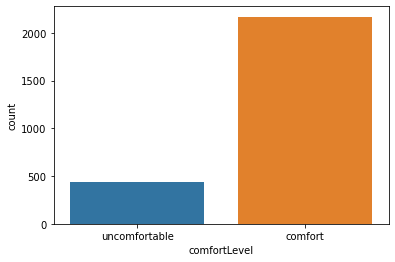

In [291]:
sns.countplot(x='comfortLevel', data=data)

In [292]:
# sns.pairplot(data=data, hue='comfortLevel')

<AxesSubplot:>

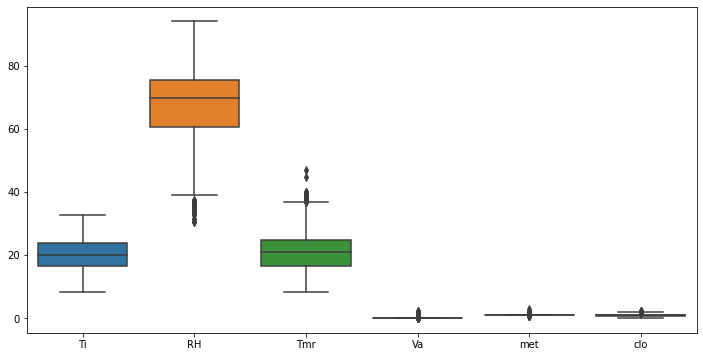

In [293]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

Dari boxplot di atas, masih terdapat *outlier* pada fitur Tmr, Va, met, dan clo. Untuk mengatasi masalah ini, maka nantinya akan dilakukan standarisasi saat modeling

<AxesSubplot:>

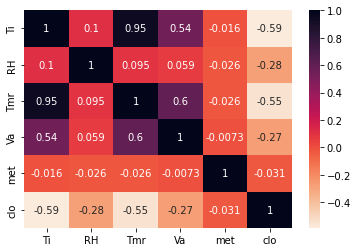

In [294]:
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')

# Classification 

In [295]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

###### Scaling Data

In [296]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

###### Splitting Data

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [298]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1822, 6) (782, 6)
(1822,) (782,)


###### Models Accuracy

In [299]:
modelsAccuracy = pd.DataFrame(columns=['Model', 'Accuracy'])

models = [('Logistic Regression', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Random Forest', RandomForestClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Naive Bayes', GaussianNB())]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)

    modelsAccuracy = modelsAccuracy.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)
    
    report = classification_report(y_test, y_pred)
    print(f'{name}\n{report}')
    
modelsAccuracy

Logistic Regression
               precision    recall  f1-score   support

      comfort       0.82      1.00      0.90       644
uncomfortable       0.00      0.00      0.00       138

     accuracy                           0.82       782
    macro avg       0.41      0.50      0.45       782
 weighted avg       0.68      0.82      0.74       782

KNN
               precision    recall  f1-score   support

      comfort       0.83      0.94      0.88       644
uncomfortable       0.20      0.07      0.11       138

     accuracy                           0.79       782
    macro avg       0.51      0.51      0.49       782
 weighted avg       0.71      0.79      0.74       782



C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\

SVM
               precision    recall  f1-score   support

      comfort       0.82      1.00      0.90       644
uncomfortable       0.00      0.00      0.00       138

     accuracy                           0.82       782
    macro avg       0.41      0.50      0.45       782
 weighted avg       0.68      0.82      0.74       782

Random Forest
               precision    recall  f1-score   support

      comfort       0.83      0.96      0.89       644
uncomfortable       0.37      0.10      0.16       138

     accuracy                           0.81       782
    macro avg       0.60      0.53      0.53       782
 weighted avg       0.75      0.81      0.76       782

Decision Tree
               precision    recall  f1-score   support

      comfort       0.83      0.84      0.84       644
uncomfortable       0.23      0.22      0.22       138

     accuracy                           0.73       782
    macro avg       0.53      0.53      0.53       782
 weighted avg       0.73 

,Model,Accuracy
0,Logistic Regression,0.823529
1,KNN,0.785166
2,SVM,0.823529
3,Random Forest,0.810742
4,Decision Tree,0.732737
5,Naive Bayes,0.805627


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

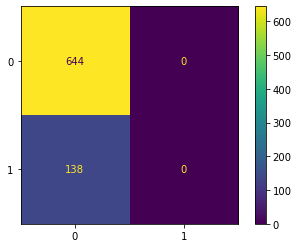

In [300]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cold','neutral','warm'])
    disp.plot()
    plt.title(name)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scoreCV = pd.DataFrame(columns=['Model', 'Cross Val Score'])

for name, model in models:
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'{name} : {score}')
    
    scoreCV = scoreCV.append({'Model':name, 'Cross Val Score':score.mean()}, ignore_index=True)

scoreCV